# Outfit Tags Exploration  
In this notebook, I explore each category and its corresponding tags separately.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/RecSys_206894495'

In [ ]:
!pip install pyarrow

import warnings
warnings.filterwarnings('ignore')

#Import libreirs
import pandas as pd
import numpy as np
import re

#Visulizetion
import seaborn as sns
import matplotlib.pyplot as plt

#Garbage collector
import gc

#Random
import random
#Set random seed
RSEED = 10
random.seed(RSEED)

In [ ]:
outfit_tags=pd.read_parquet(path+'/archive/data/outfit_tags.parquet',engine='pyarrow')
outfit_tags.head()

,id,tag,category
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Synthetic,Material
1,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Statement,Occasion
2,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Dresses,Category
3,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Metallic,Details
4,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Mini,Length


In [ ]:
outfit_tags['category'].nunique()

11

In [ ]:
# Group by 'id' and 'tag' and count occurrences
tag_counts = outfit_tags.groupby(['id', 'tag']).size().reset_index(name='count')

tag_counts['count'].unique()

array([1], dtype=int64)

There is no tags that repeate it self for the same outfit

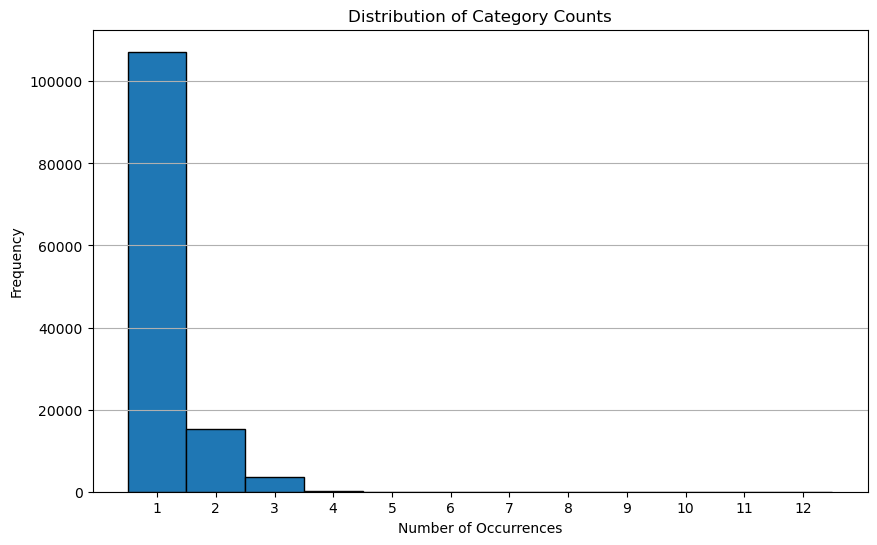

In [ ]:
# Group by 'id' and 'category' and count occurrences
category_counts = outfit_tags.groupby(['id', 'category']).size().reset_index(name='count')

# Plot the distribution of category_counts
plt.figure(figsize=(10, 6))
plt.hist(category_counts['count'], bins=range(1, category_counts['count'].max() + 2), align='left', edgecolor='black')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Category Counts')
plt.xticks(range(1, category_counts['count'].max() + 1))
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
outfit_tags['category'].unique()

array(['Material', 'Occasion', 'Category', 'Details', 'Length', 'Size',
       'Color', 'Brand', 'Seasons', 'Gender', 'Fit'], dtype=object)

In [ ]:
# Group by count to find unique categories with specific occurrences
unique_categories_by_count = category_counts.groupby('count')['category'].unique().reset_index()

# Print each row in a loop
for index, row in unique_categories_by_count.iterrows():
    print(f"Count: {row['count']}, Categories: {row['category']}")

Count: 1, Categories: ['Brand' 'Category' 'Color' 'Fit' 'Gender' 'Material' 'Size' 'Length'
 'Occasion' 'Seasons' 'Details']
Count: 2, Categories: ['Occasion' 'Brand' 'Seasons' 'Material' 'Fit' 'Category' 'Size' 'Color'
 'Details' 'Length']
Count: 3, Categories: ['Seasons' 'Color' 'Occasion' 'Material' 'Category' 'Fit' 'Details'
 'Brand' 'Length' 'Size']
Count: 4, Categories: ['Color' 'Occasion' 'Seasons' 'Material' 'Category' 'Details' 'Size']
Count: 5, Categories: ['Color' 'Size']
Count: 6, Categories: ['Material' 'Color']
Count: 11, Categories: ['Color']
Count: 12, Categories: ['Color']


In [ ]:
# Find a row with the category 'Seasons'
row = outfit_tags[outfit_tags['category'] == 'Seasons']
print(row.shape)
print(row['tag'].unique())
row.head()

(20294, 3)
['Spring' 'Summer' 'Multi Season' 'Winter' 'Fall']


,id,tag,category
11,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Spring,Seasons
12,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Summer,Seasons
24,outfit.fff175b13ceb453f9928625491412ede,Multi Season,Seasons
30,outfit.ffef9d7c292a48b69076d2df2e32352f,Multi Season,Seasons
43,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Winter,Seasons


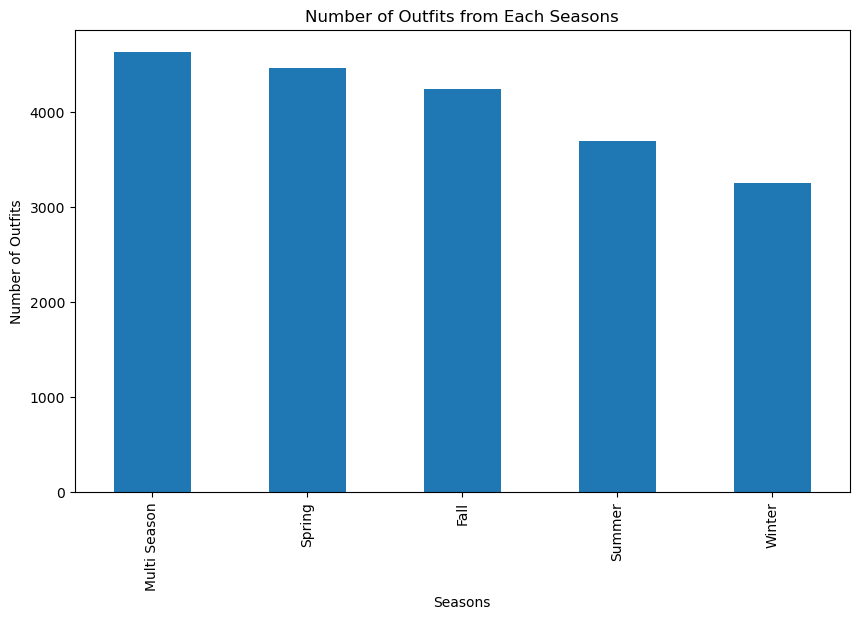

In [ ]:
# Filter the dataframe where category is 'Seasons'
filtered_df = outfit_tags[outfit_tags['category'] == 'Seasons']

# Plot the number of purchases from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Seasons')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Seasons')
plt.show()


opion - Multi Season as 1 for all

In [ ]:
# Find a row with the category 'Brand'
row = outfit_tags[outfit_tags['category'] == 'Brand']
print(row.shape)
print(row['tag'].nunique())
row.head()

(15210, 3)
551


,id,tag,category
8,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Sandro,Brand
9,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,ILAG,Brand
28,outfit.fff175b13ceb453f9928625491412ede,Rodebjer,Brand
31,outfit.ffef9d7c292a48b69076d2df2e32352f,Stylein,Brand
47,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Kupong knit.wear,Brand


There are too many brands to explore effectively in the same manner as the other categories.

In [ ]:
# Find a row with the category 'Category'
row = outfit_tags[outfit_tags['category'] == 'Category']
print(row.shape)
print(row['tag'].unique())
row.head()

(17220, 3)
['Dresses' 'Tops' 'Blouses' 'Knitwear' 'Trousers' 'Blazers' 'Accessories'
 'Jewelry' 'Shirts' 'Coats' 'Bags' 'Jackets' 'Jumpsuits' 'Skirts'
 'Sweaters' 'Vests' 'Cardigans' 'Shoes' 'Shorts']


,id,tag,category
2,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Dresses,Category
10,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Tops,Category
17,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Blouses,Category
26,outfit.fff175b13ceb453f9928625491412ede,Dresses,Category
32,outfit.ffef9d7c292a48b69076d2df2e32352f,Tops,Category


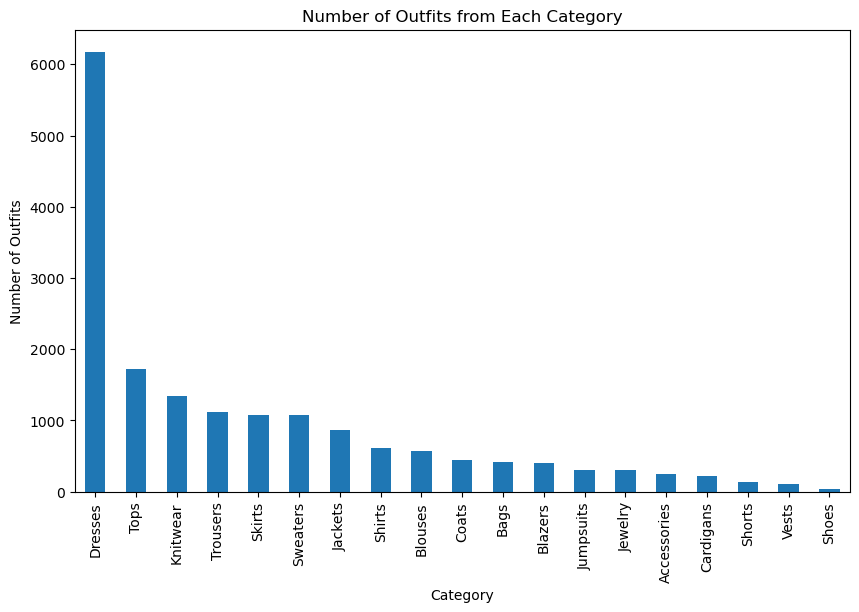

In [ ]:
# Filter the dataframe where category is 'Category'
filtered_df = outfit_tags[outfit_tags['category'] == 'Category']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Category')
plt.show()


In [ ]:
# Find a row with the category 'Details'
row = outfit_tags[outfit_tags['category'] == 'Details']
print(row.shape)
print(row['tag'].unique())
row.head()

(5704, 3)
['Metallic' 'Pattern' 'Floral' 'Ruffles' 'Animal print' 'Checkers'
 'Stripes' 'Sequins' 'Beaded']


,id,tag,category
3,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Metallic,Details
14,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Pattern,Details
36,outfit.ffef9d7c292a48b69076d2df2e32352f,Floral,Details
54,outfit.ffebad2c479045a78adecdcd8f07427d,Floral,Details
85,outfit.ffd83466cdb84a0dba02339aa0c72f73,Metallic,Details


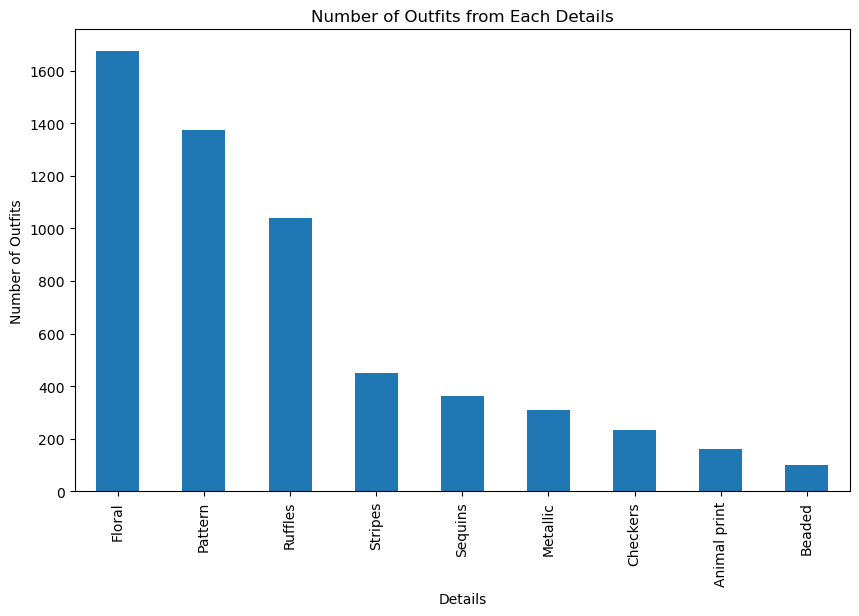

In [ ]:
# Filter the dataframe where category is 'Details'
filtered_df = outfit_tags[outfit_tags['category'] == 'Details']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Details')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Details')
plt.show()


In [ ]:
# Find a row with the category 'Fit'
row = outfit_tags[outfit_tags['category'] == 'Fit']
print(row.shape)
print(row['tag'].unique())
row.head()

(2783, 3)
['Wrap' 'Stretchy' 'Maternity' 'Oversized' 'Curve' 'Cropped']


,id,tag,category
35,outfit.ffef9d7c292a48b69076d2df2e32352f,Wrap,Fit
105,outfit.ffb899de4ec64c79becf7794e1c30031,Wrap,Fit
333,outfit.ff154c3d8e2f49099b9a633559af8d97,Stretchy,Fit
368,outfit.ff0b0e4e4b3044a4b36d9f3c889e0f6e,Wrap,Fit
422,outfit.fef8bbf2fe2944f4a5cb96caca449b1a,Stretchy,Fit


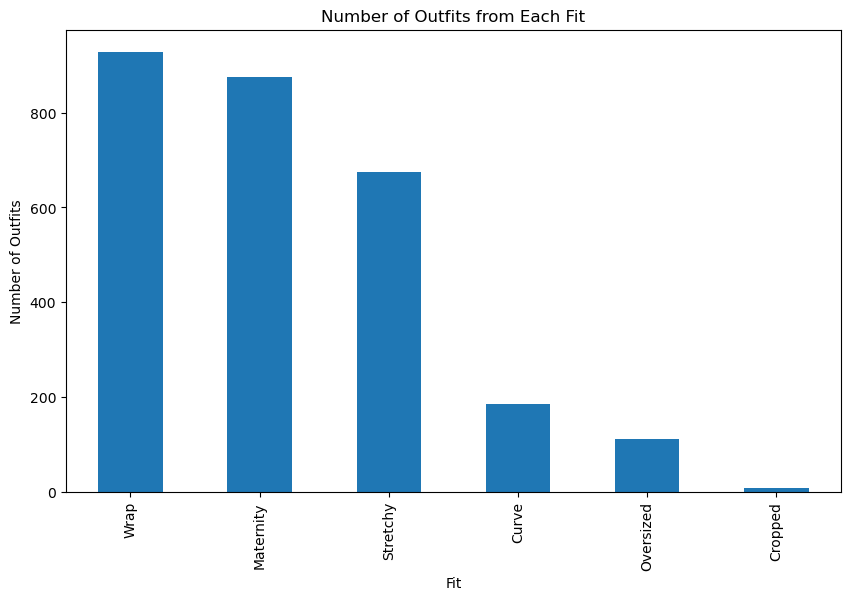

In [ ]:
# Filter the dataframe where category is 'Fit'
filtered_df = outfit_tags[outfit_tags['category'] == 'Fit']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Fit')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Fit')
plt.show()


In [ ]:
# Find a row with the category 'Gender'
row = outfit_tags[outfit_tags['category'] == 'Gender']
print(row.shape)
print(row['tag'].unique())
row.head()

(11764, 3)
['Women' 'Men']


,id,tag,category
16,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Women,Gender
25,outfit.fff175b13ceb453f9928625491412ede,Women,Gender
37,outfit.ffef9d7c292a48b69076d2df2e32352f,Women,Gender
46,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Women,Gender
50,outfit.ffebad2c479045a78adecdcd8f07427d,Women,Gender


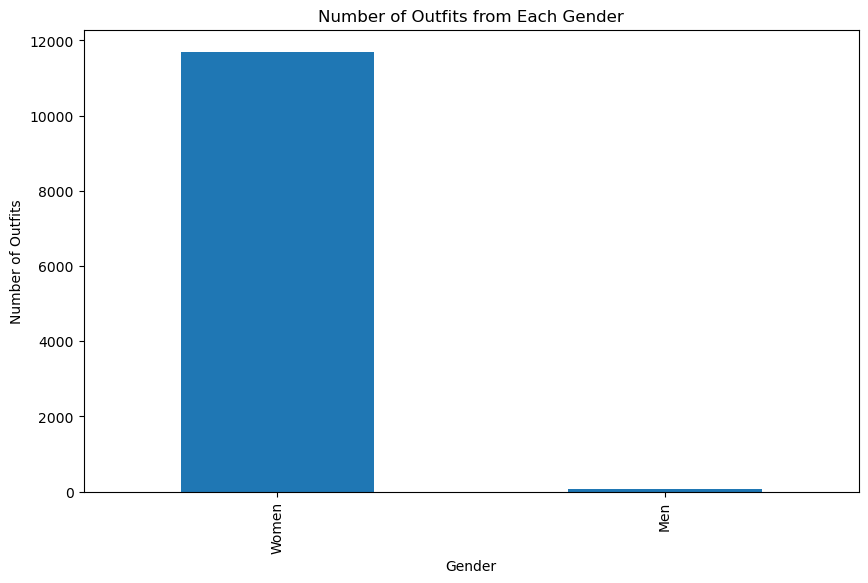

In [ ]:
# Filter the dataframe where category is 'Gender'
filtered_df = outfit_tags[outfit_tags['category'] == 'Gender']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Gender')
plt.show()


In [ ]:
print('Women: '+str(len(outfit_tags[outfit_tags['tag']=='Women'])))
print('Men: '+str(len(outfit_tags[outfit_tags['tag']=='Men'])))

Women: 11702
Men: 62


In [ ]:
# Find a row with the category 'Material'
row = outfit_tags[outfit_tags['category'] == 'Material']
print(row.shape)
print(row['tag'].unique())
row.head()

(17214, 3)
['Synthetic' 'Cotton' 'Viscose' 'Wool' 'Chiffon' 'Metal' 'Faux Leather'
 'Linen' 'Velvet' 'Silk' 'Faux fur' 'Lyocell' 'Cupro' 'Leather' 'Lace'
 'Modal' 'Denim' 'Corderoy' 'Crochet']


,id,tag,category
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Synthetic,Material
5,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Cotton,Material
19,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Cotton,Material
27,outfit.fff175b13ceb453f9928625491412ede,Synthetic,Material
33,outfit.ffef9d7c292a48b69076d2df2e32352f,Cotton,Material


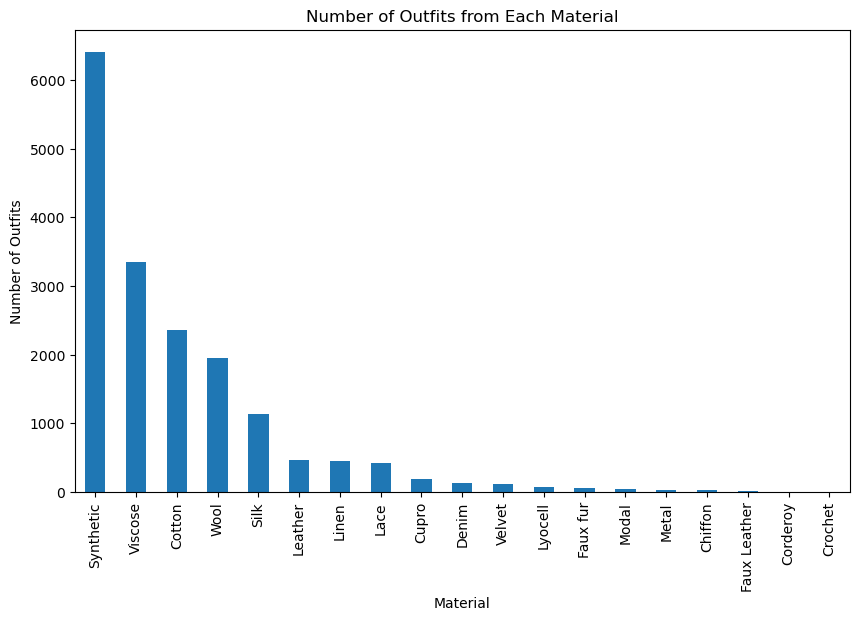

In [ ]:
# Filter the dataframe where category is 'Material'
filtered_df = outfit_tags[outfit_tags['category'] == 'Material']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Material')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Material')
plt.show()


In [ ]:
# Find a row with the category 'Size'
row = outfit_tags[outfit_tags['category'] == 'Size']
print(row.shape)
print(row['tag'].unique())
row.head()

(15497, 3)
['S' 'M' 'XS' 'L' 'Onesize' 'XL' 'XXL' '39' '4XL' '40' '5XL' 'XXS' '3XL'
 '41' '37' '36' '38']


,id,tag,category
6,outfit.fffdaa715c3646f8b1c0f04d549ff07e,S,Size
13,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,M,Size
22,outfit.fff175b13ceb453f9928625491412ede,M,Size
29,outfit.ffef9d7c292a48b69076d2df2e32352f,XS,Size
42,outfit.ffeef842238f4dbdabc6c730a75aa2bd,L,Size


option - serial

https://aws.tradeinn.com/images/pdf/cuadro_tallas/eng_flyingfisherman_size.pdf

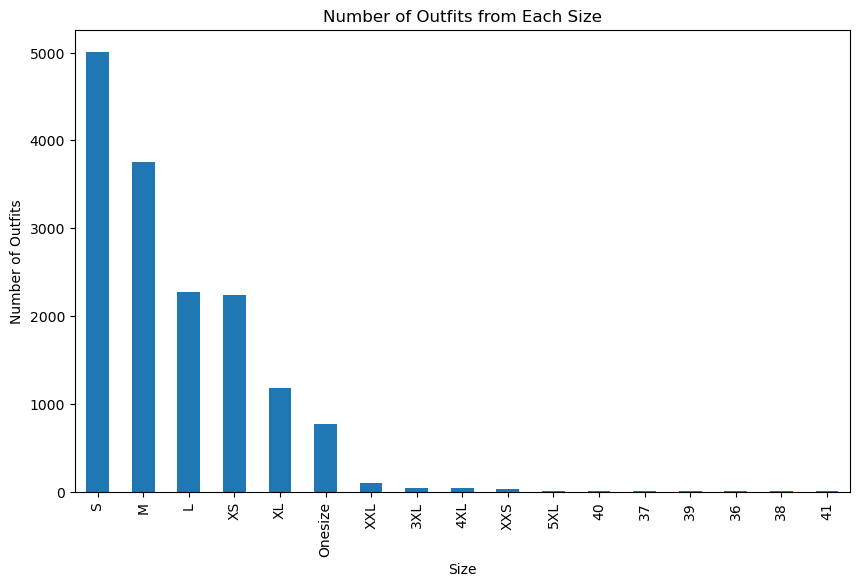

In [ ]:
# Filter the dataframe where category is 'Category'
filtered_df = outfit_tags[outfit_tags['category'] == 'Size']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Size')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Size')
plt.show()


In [ ]:
#Quick conversion to get an idea of the sizes
size_mapping = {
    '32': 'XXS',
    '34': 'XS',
    '36': 'S',
    '37':'M',
    '38': 'M',
    '39': 'L',
    '40': 'L',
    '41': 'L',
    '42': 'XL',
    '44': 'XXL'
}
filtered_df = filtered_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Convert the sizes in the dataframe
filtered_df['tag'] = filtered_df['tag'].apply(lambda x: size_mapping.get(x, x))

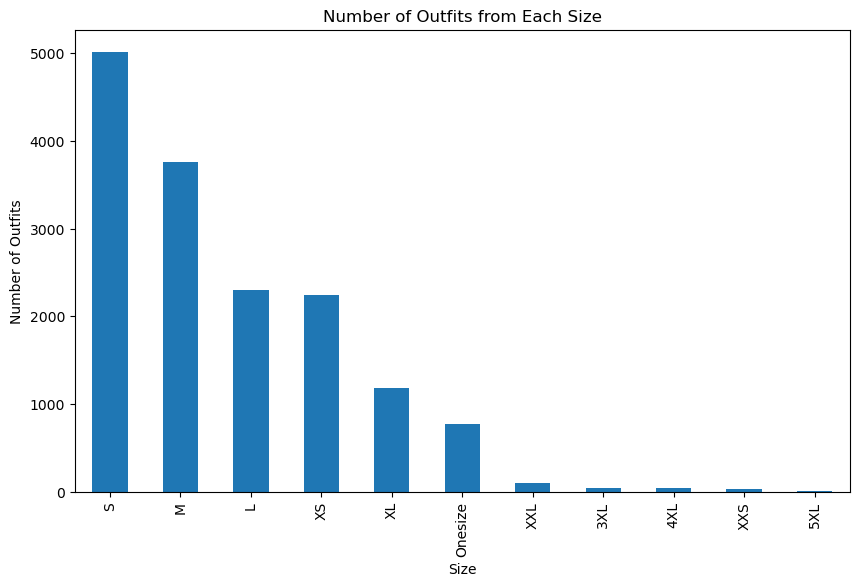

In [ ]:
# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Size')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Size')
plt.show()


In [ ]:
# Find a row with the category 'Length'
row = outfit_tags[outfit_tags['category'] == 'Length']
print(row.shape)
print(row['tag'].unique())
row.head()

(6957, 3)
['Mini' 'Maxi' 'Midi']


,id,tag,category
4,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Mini,Length
21,outfit.fff175b13ceb453f9928625491412ede,Mini,Length
57,outfit.ffebad2c479045a78adecdcd8f07427d,Maxi,Length
95,outfit.ffc78fc7b53244639c3d0b51156ea5a6,Maxi,Length
97,outfit.ffb97d291b8d45be9b45bb5042bdc3b8,Mini,Length


option - serial

https://infinite.styletheory.co/flattering-hemlines-for-body-types/

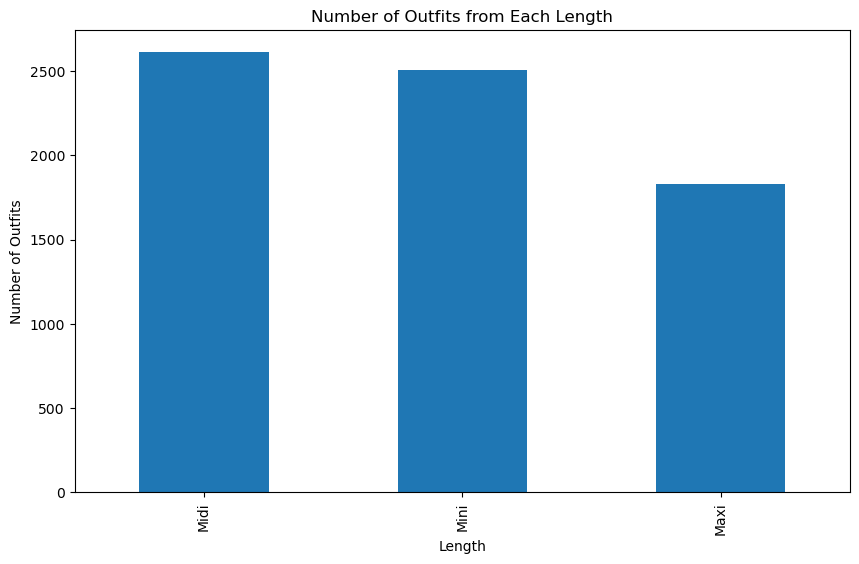

In [ ]:
# Filter the dataframe where category is 'Length'
filtered_df = outfit_tags[outfit_tags['category'] == 'Length']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Length')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Length')
plt.show()


In [ ]:
# Find a row with the category 'Occasion'
row = outfit_tags[outfit_tags['category'] == 'Occasion']
print(row.shape)
print(row['tag'].unique())
row.head()

(20720, 3)
['Statement' 'Everyday' 'Dressed-up' 'Business' 'Formal' 'Active']


,id,tag,category
1,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Statement,Occasion
18,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Everyday,Occasion
23,outfit.fff175b13ceb453f9928625491412ede,Everyday,Occasion
40,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Everyday,Occasion
49,outfit.ffebad2c479045a78adecdcd8f07427d,Dressed-up,Occasion


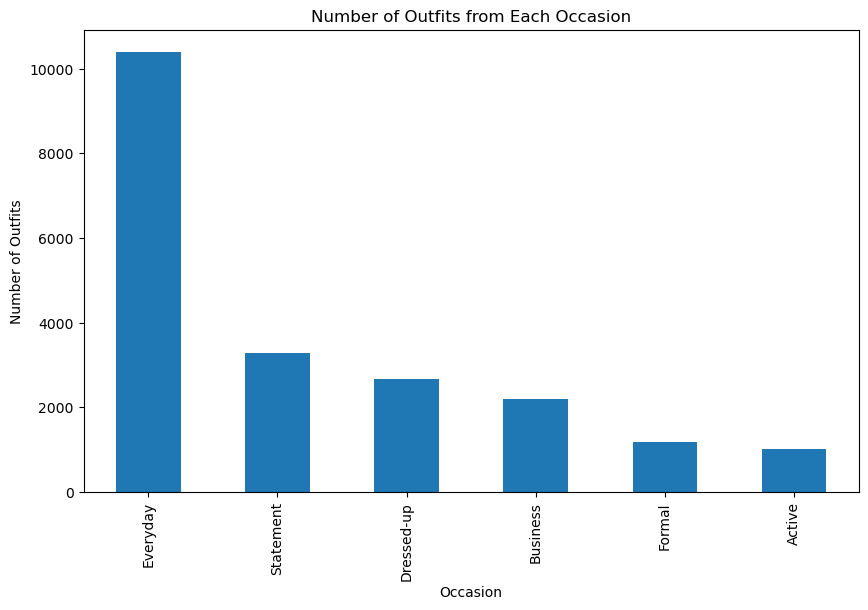

In [ ]:
# Filter the dataframe where category is 'Occasion'
filtered_df = outfit_tags[outfit_tags['category'] == 'Occasion']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Occasion')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Occasion')
plt.show()


In [ ]:
# Find a row with the category 'Color'
row = outfit_tags[outfit_tags['category'] == 'Color']
print(row.shape)
print(row['tag'].unique())
row.head()

(16787, 3)
['Black' 'Yellow' 'Multicolor' 'Grey' 'Blue' 'Pink' 'Brown' 'White'
 'Beige' 'Green' 'Red' 'Orange' 'Purple' 'Gold' 'Silver']


,id,tag,category
7,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Black,Color
15,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow,Color
20,outfit.fff175b13ceb453f9928625491412ede,Black,Color
34,outfit.ffef9d7c292a48b69076d2df2e32352f,Multicolor,Color
39,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black,Color


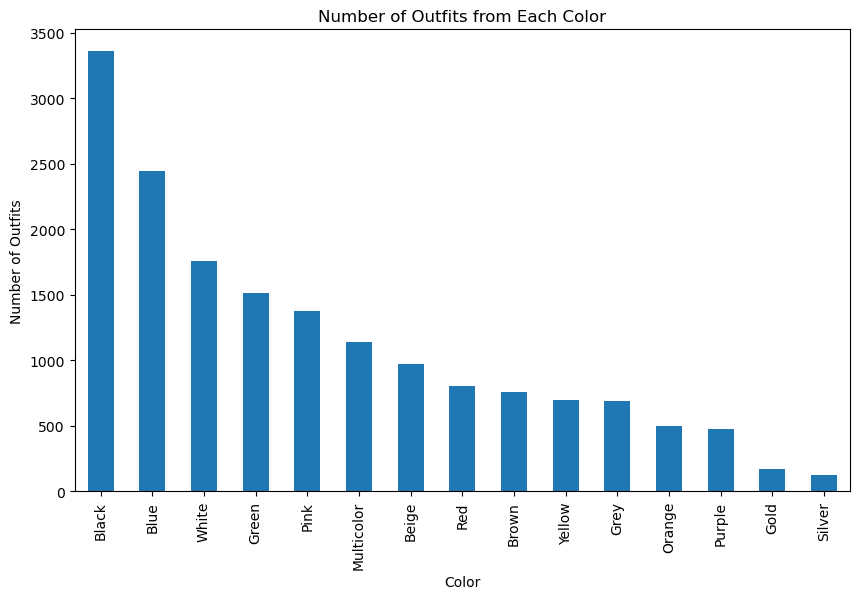

In [ ]:
# Filter the dataframe where category is 'Color'
filtered_df = outfit_tags[outfit_tags['category'] == 'Color']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Color')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Color')
plt.show()


In [ ]:
outfits=pd.read_parquet('../archive/data/outfits.parquet',engine='pyarrow')
outfits.head()

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


In [ ]:
# Merge with outfits on the id column
merged_df = pd.merge(outfit_tags, outfits, on='id')

In [ ]:
merged_df.columns

Index(['id', 'tag', 'category', 'name', 'description', 'group', 'owner',
       'timeCreated', 'retailPrice', 'pricePerWeek', 'pricePerMonth',
       'outfit_tags', 'tag_categories'],
      dtype='object')

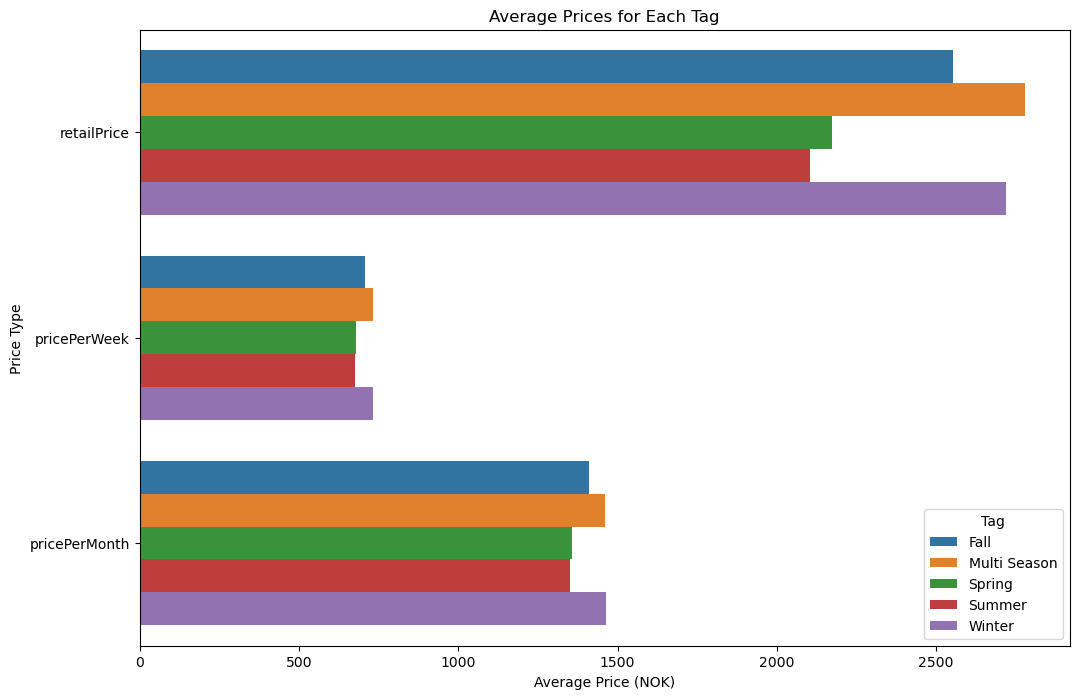

In [ ]:
# Filter the dataframe to category "Seasons"
filtered_df = merged_df[merged_df['category'] == 'Seasons']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

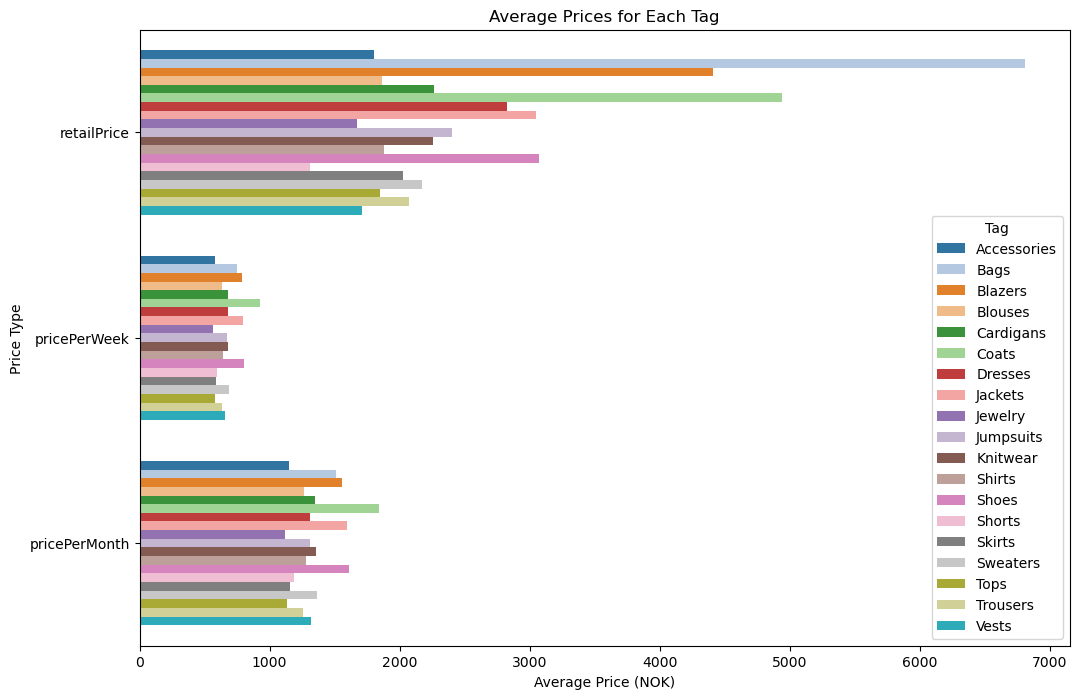

In [ ]:
# Filter the dataframe to category "Category"
filtered_df = merged_df[merged_df['category'] == 'Category']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

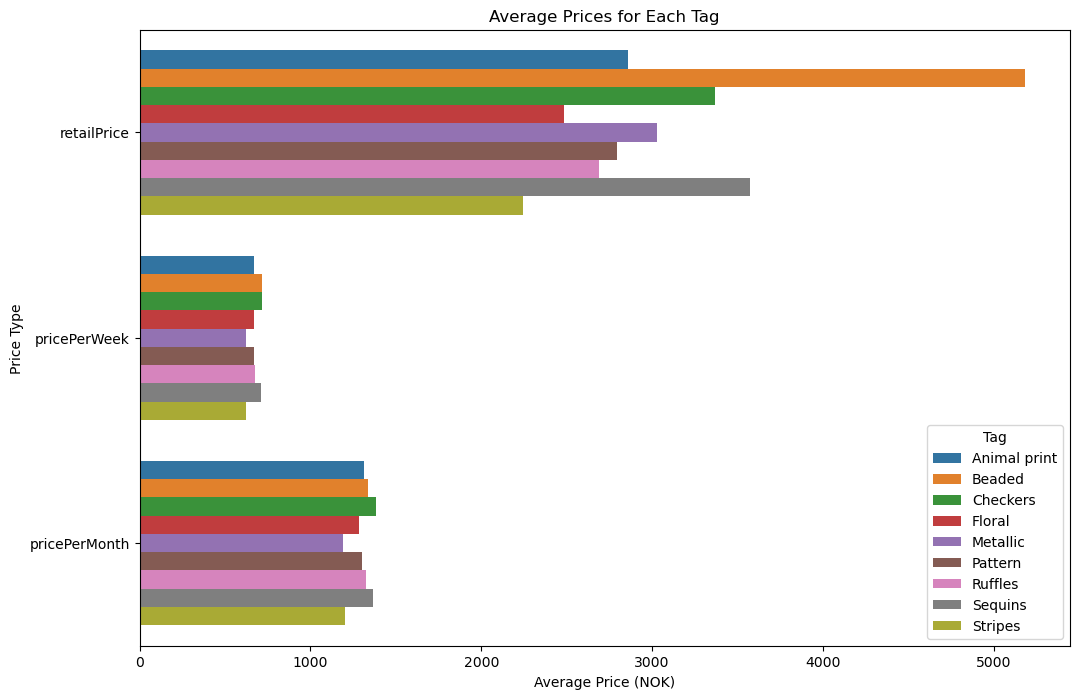

In [ ]:
# Filter the dataframe to category "Details"
filtered_df = merged_df[merged_df['category'] == 'Details']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

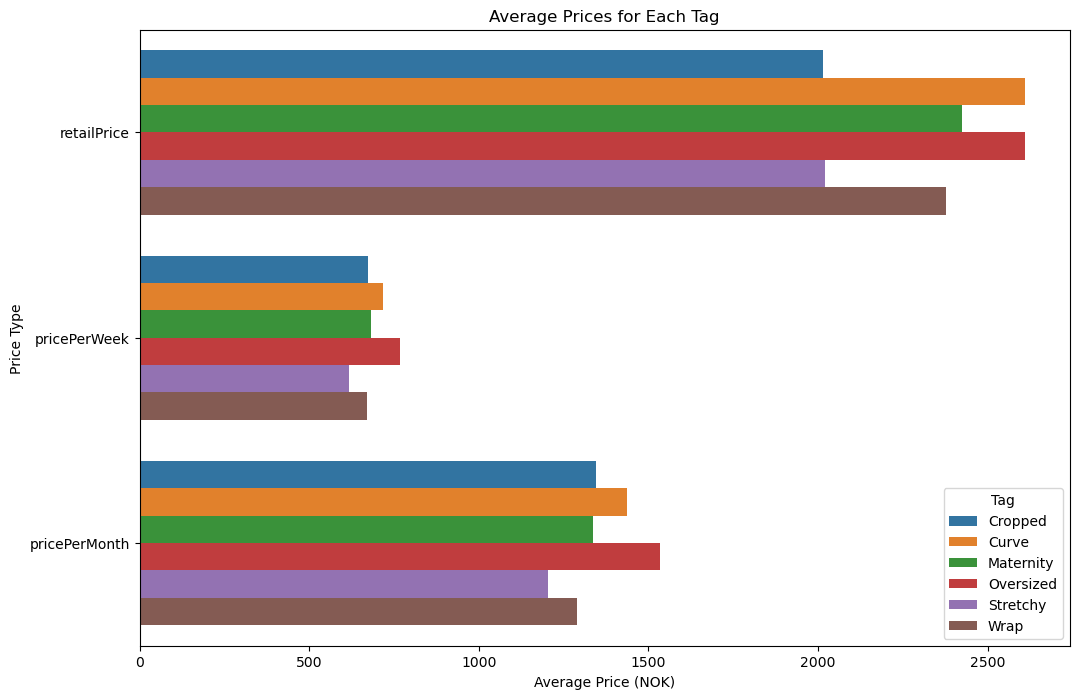

In [ ]:
# Filter the dataframe to category "Fit"
filtered_df = merged_df[merged_df['category'] == 'Fit']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

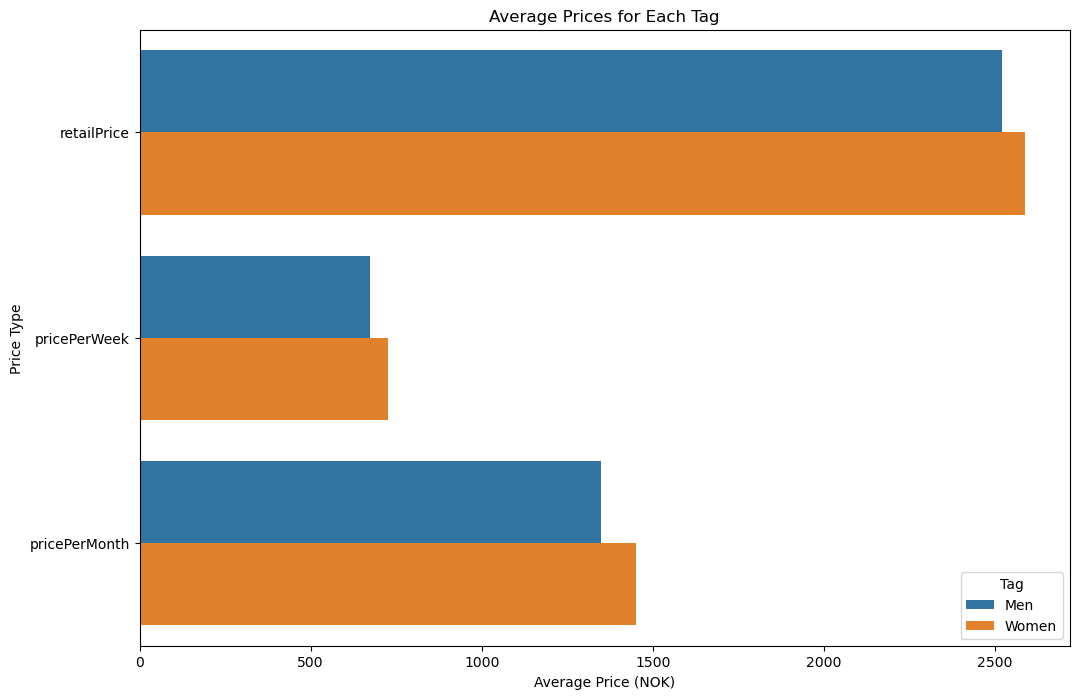

In [ ]:
# Filter the dataframe to category "Gender"
filtered_df = merged_df[merged_df['category'] == 'Gender']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

As previously observed, this analysis is not particularly meaningful since there are very few men's outfits in the dataset.

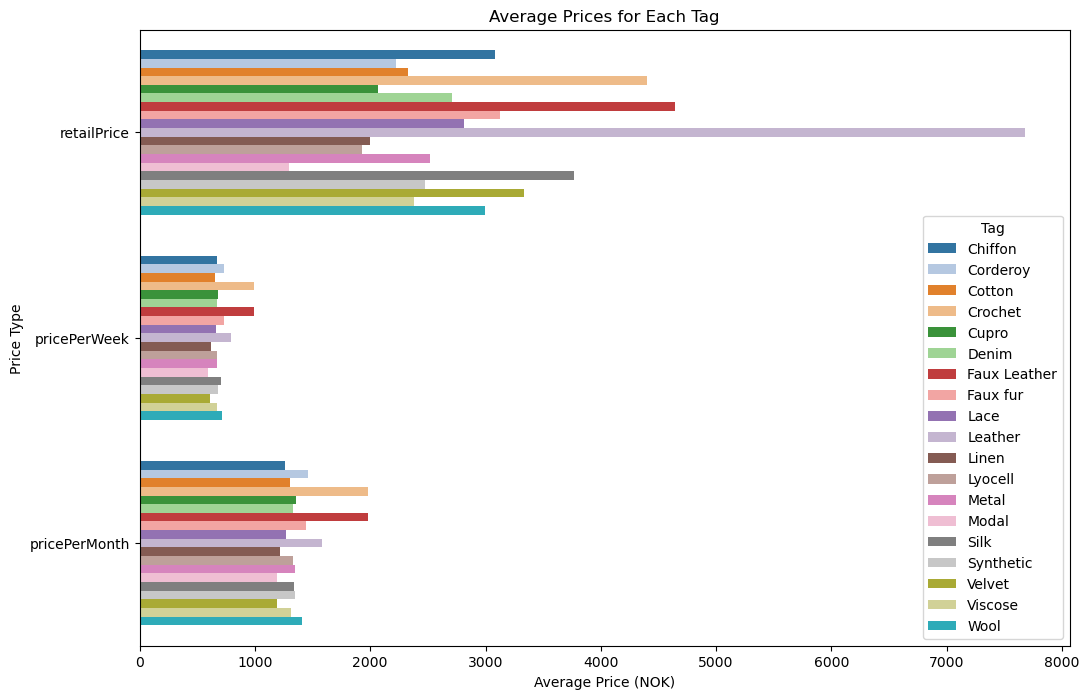

In [ ]:
# Filter the dataframe to category "Material"
filtered_df = merged_df[merged_df['category'] == 'Material']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

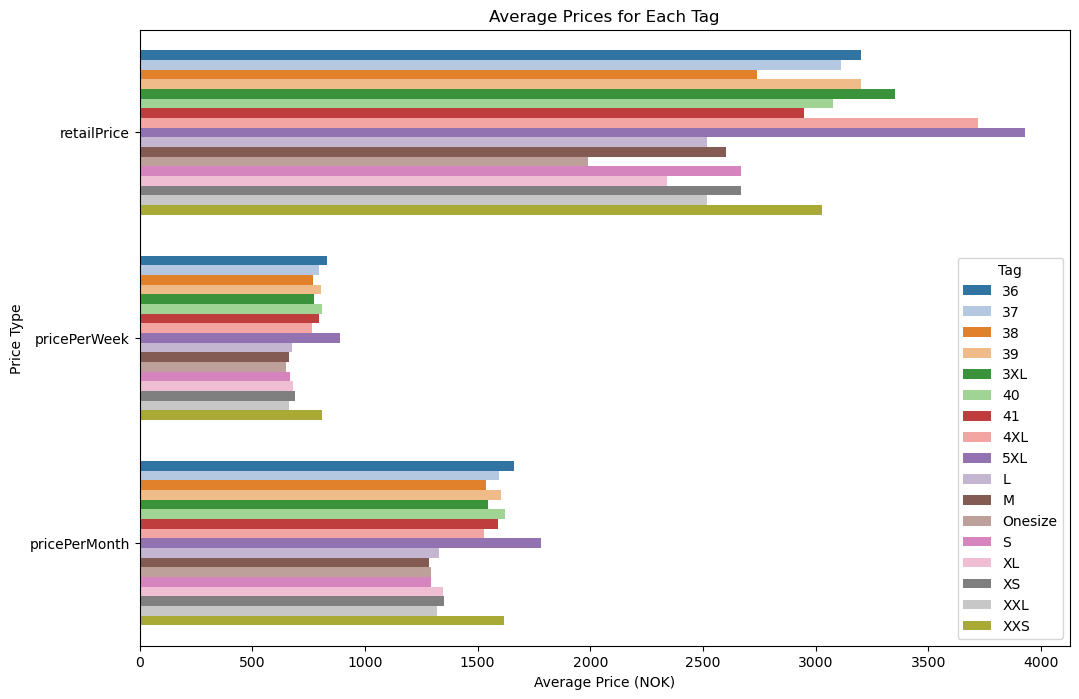

In [ ]:
# Filter the dataframe to category "Size"
filtered_df = merged_df[merged_df['category'] == 'Size']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

In [ ]:
#Quick conversion to get an idea of the sizes
size_mapping = {
    '32': 'XXS',
    '34': 'XS',
    '36': 'S',
    '37':'M',
    '38': 'M',
    '39': 'L',
    '40': 'L',
    '41': 'L',
    '42': 'XL',
    '44': 'XXL'
}
filtered_df = filtered_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Convert the sizes in the dataframe
filtered_df['tag'] = filtered_df['tag'].apply(lambda x: size_mapping.get(x, x))

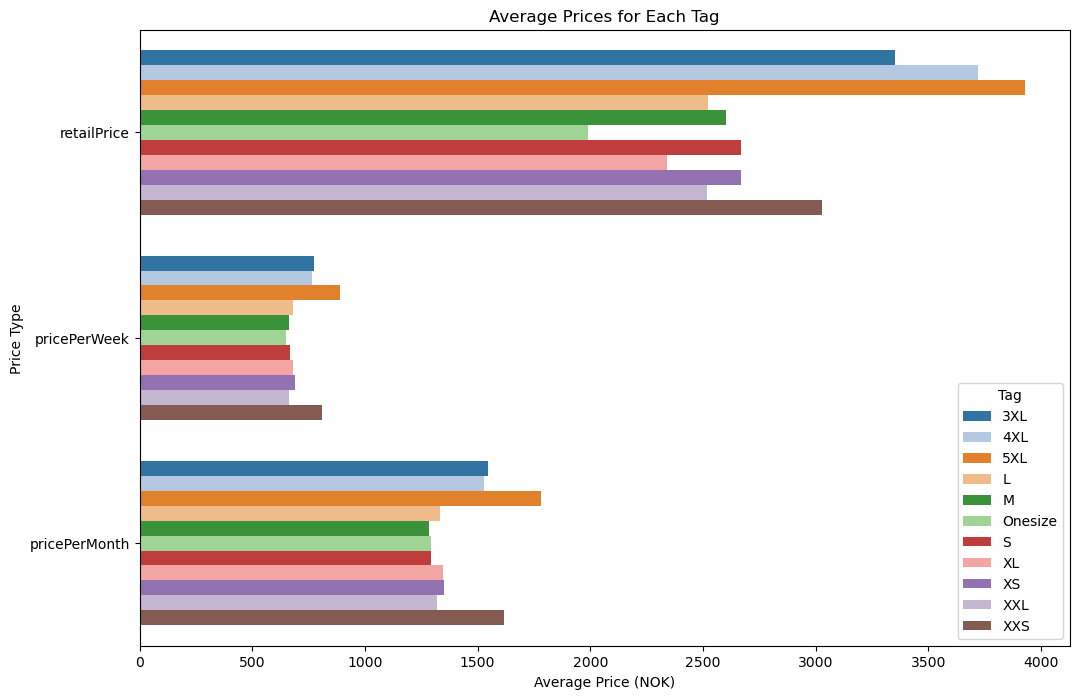

In [ ]:
# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

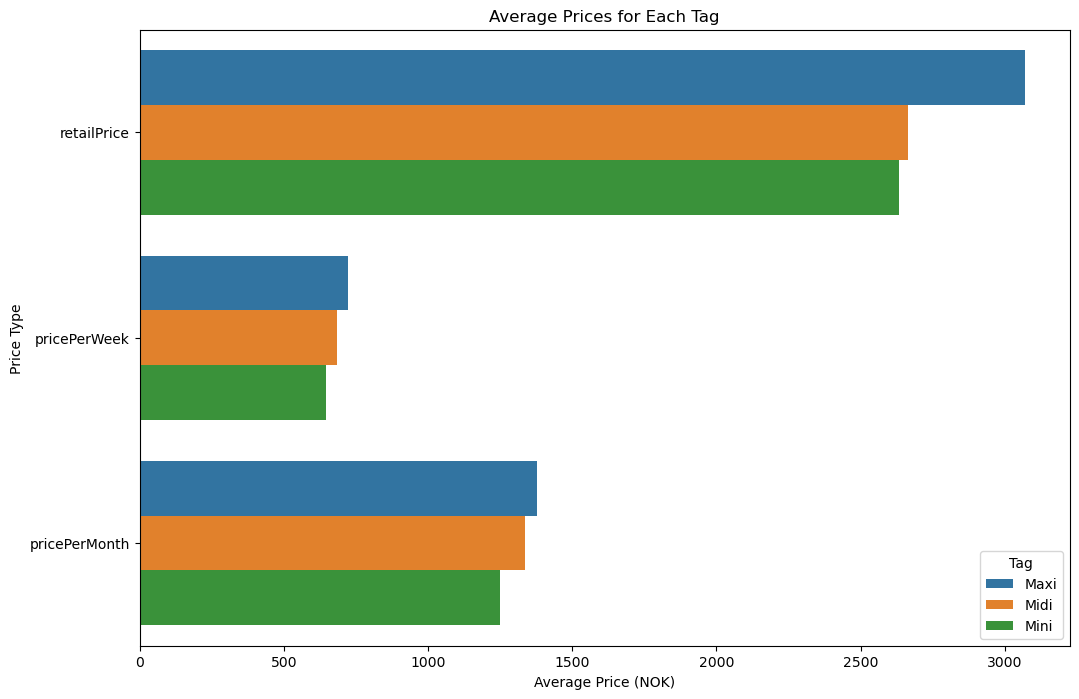

In [ ]:
# Filter the dataframe to category "Length"
filtered_df = merged_df[merged_df['category'] == 'Length']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

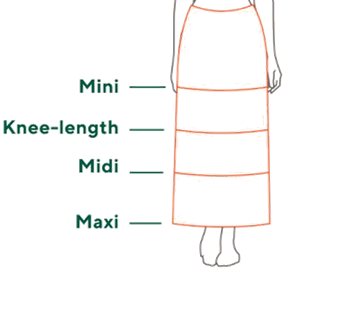

Infinite Style Theory. (2019, November 13). Which hemline is the most flattering for your body type? Retrieved from https://infinite.styletheory.co/flattering-hemlines-for-body-types/

It can be observed that outfit length may serve as an indicator of price, with longer outfits generally costing more.

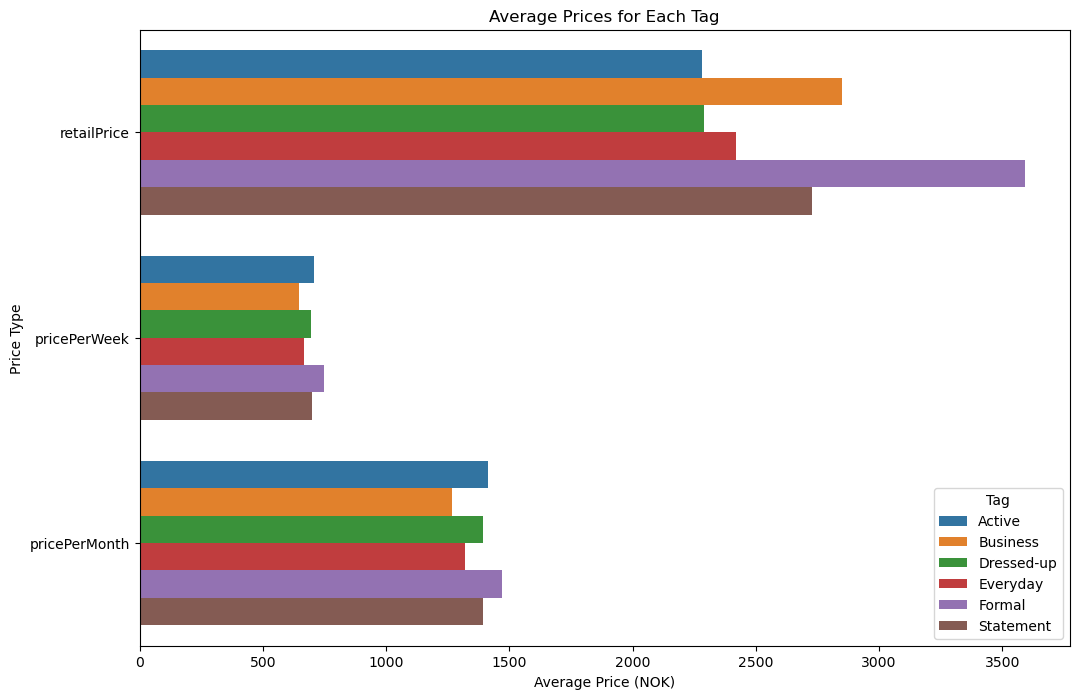

In [ ]:
# Filter the dataframe to category "Occasion"
filtered_df = merged_df[merged_df['category'] == 'Occasion']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

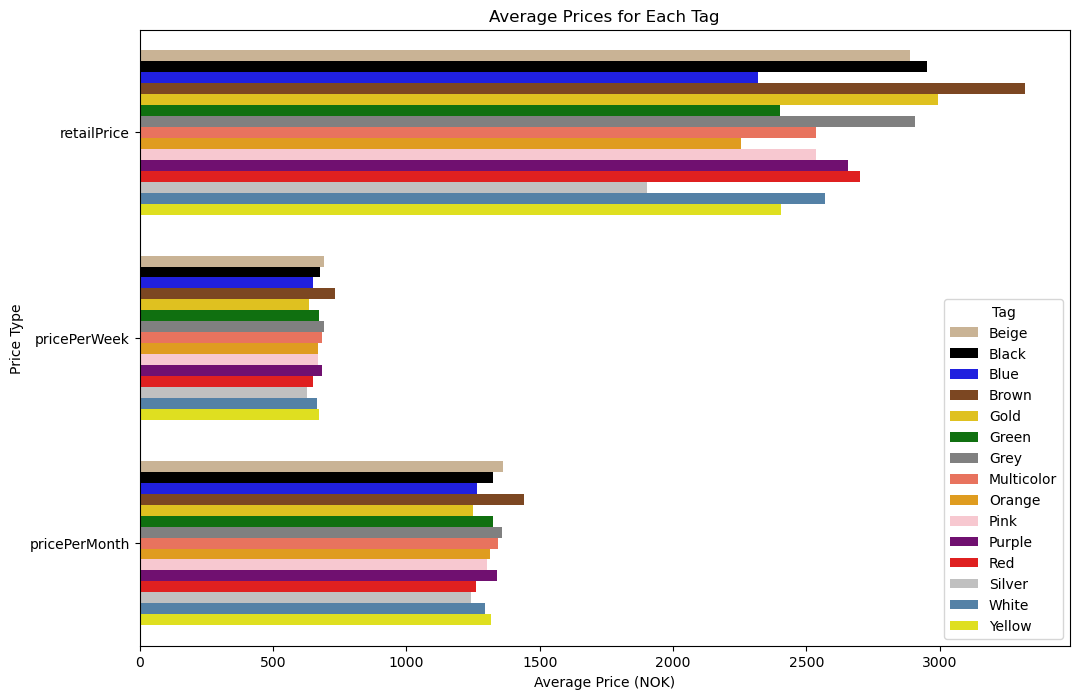

In [ ]:
# Filter the dataframe according to category='Color'
filtered_df = merged_df[merged_df['category'] == 'Color']

# Define the list of tags and corresponding colors
tags = ['Beige', 'Black', 'Blue', 'Brown', 'Gold', 'Green', 'Grey', 'Multicolor', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'White', 'Yellow']
colors = ['#D2B48C', '#000000', '#0000FF', '#8B4513', '#FFD700', '#008000', '#808080', '#FF6347', '#FFA500', '#FFC0CB', '#800080', '#FF0000', '#C0C0C0', '#4682B4', '#FFFF00']

# Create a dictionary to map tags to colors
tag_color_map = dict(zip(tags, colors))

# Create a custom palette based on the tag_color_map
custom_palette = [tag_color_map[tag] for tag in tags]

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag', palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()


Unlike the categories already discussed, it can be seen that prices do not necessarily correlate with the tags across different categories.